<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Nov10-11/Tarea_4_de_noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Si bien en la prueba se ve que funciona de forma precisa creo que esto se debe a que la mayoría de imágenes que se usaron son de gatos, por lo que el modelo esta sobre ajustado para gatos, habría que mejorar el conjunto de entrenamiento

In [3]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
files=glob.glob("/content/drive/MyDrive/ML2023/CATS_DOGS/*")

In [6]:
len(files)

1787

In [7]:
num_px=64 #imagenes de 6x64

In [8]:
train_x=[] #onjuntos de entrenamiento
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px)) #Redimensionar imagenes
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y) #transformar los conjuntos de entrenamiento a arreglos
train_x=np.asarray(train_x)

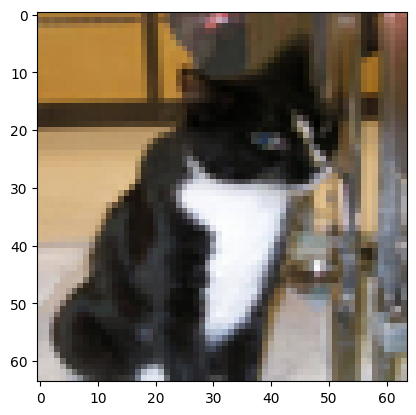

In [9]:
plt.imshow(train_x[0])
#mostrar una imagen

In [10]:
test_x=[] #conjuntos de prueba
test_y=[]
for file in files[1700:]:
    img=Image.open(file)
    img=img.resize((num_px,num_px)) #redimensionar imagen
    data=np.asarray(img) #convertir imagen en arreglo
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y) #transformar los conjuntos de entrenamiento a arreglos
test_x=np.asarray(test_x)

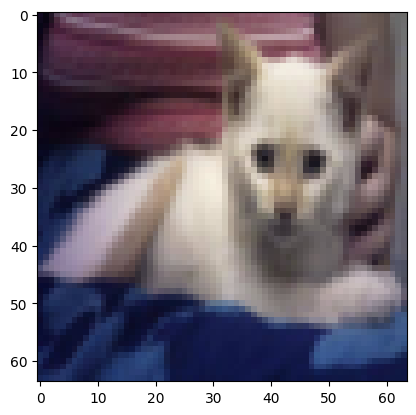

In [11]:
plt.imshow(test_x[0])

In [12]:
#transformación de los arreglos que contienen las imágenes para que sean arreglos unidimensionales

train_x_flatten = train_x.reshape(train_x.shape[0], -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [13]:
#normalizar las imágenes

train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [22]:
#Funcion sigmode
def sigmoide(z):
  return 1/(1+(np.e**(-1*z)))

#Derivada de la función sigmoide
def derivada_sigmoide(z):
  return (np.e)**z/(1+(np.e**(-1*z)))**2

#Actualizar parámetros
def wn(w,b,alpha,x,y): #alpha es la tasa de aprendizaje
  m=x.shape[1]
  a=sigmoide((np.dot(w.T,train_set_x)+b)) #sigmoide de z
  w-=alpha*(1/m*np.dot(x,(a-y).T))
  b-=alpha*(1/m*np.sum(a-y))
  return w,b

#Costo
def costo(y_hat,y):
  suma=np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
  return suma * -1/(y.shape[1])

#Criterio de redondeo
def round(y):
  if y>0.5:
    return 1
  else:
    return 0

#Inicio parametros
def iniciar_parametros(dim):
  w = np.zeros((dim, 1))
  b = 0
  return w, b

def output(w,b,x):

In [34]:
#aplico gradiente descendiente
n=1500
alpha=0.01 #tasa de aprendizaje

w,b=iniciar_parametros(train_set_x.shape[0])

for i in range (n):
  yhat=sigmoide((np.dot(w.T,train_set_x)+b)) #uso yhat para calcular el costo
  cost=costo(yhat,train_set_y) #calcular costo
  wn(w,b,alpha,train_set_x,train_set_y) #actualizar los parametros w y b

output=sigmoide((np.dot(w.T,test_set_x)+b)) #salida con los parametros del gradiente descendiente
output=np.round(output)
print(output) #redondeo la salida

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


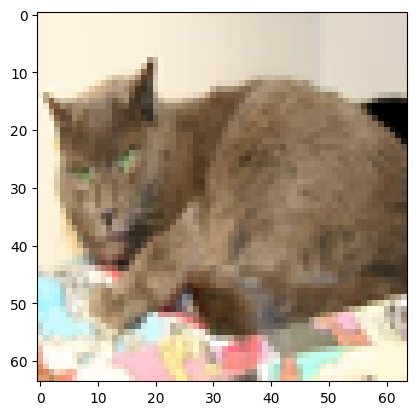

Gato


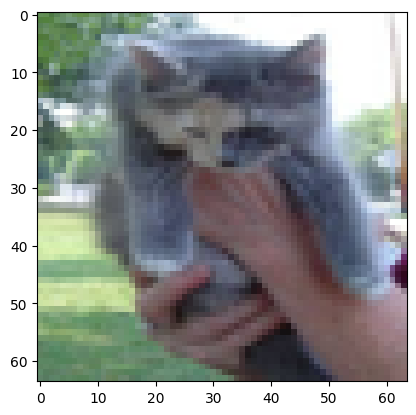

Gato


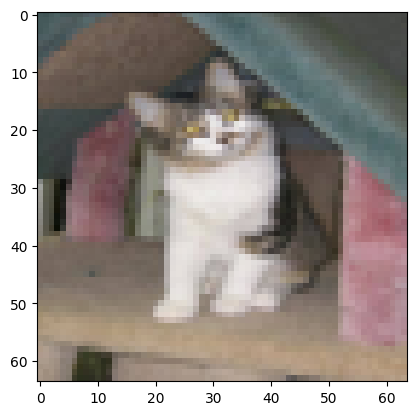

Gato


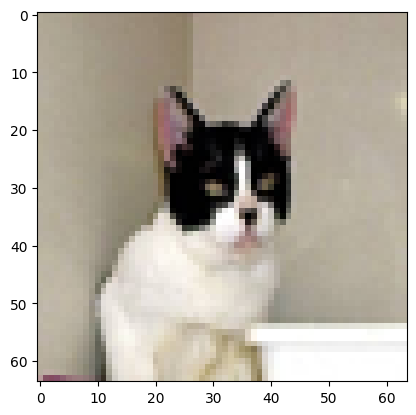

Gato


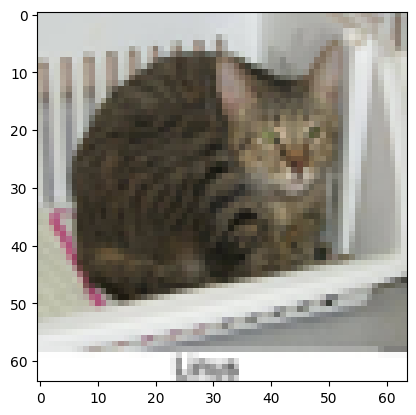

Gato


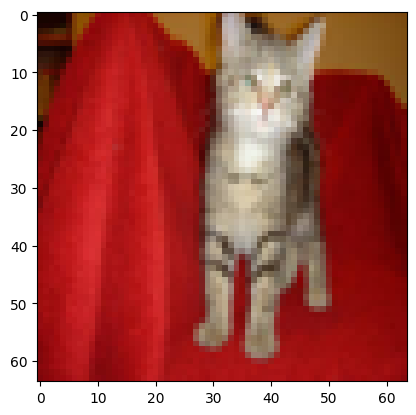

Perro


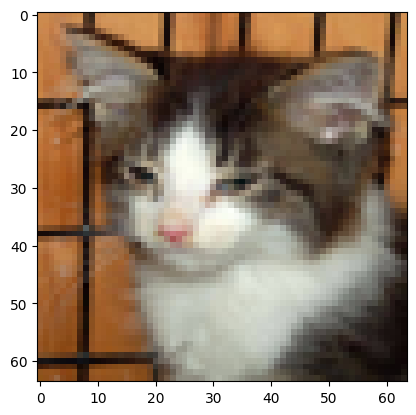

Gato


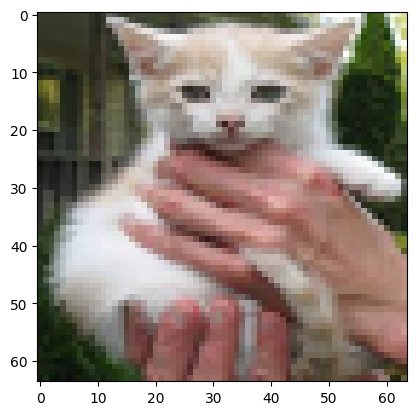

Gato


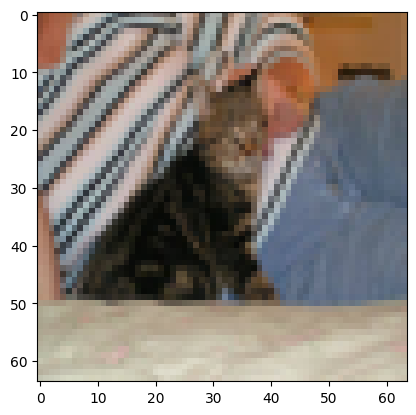

Gato


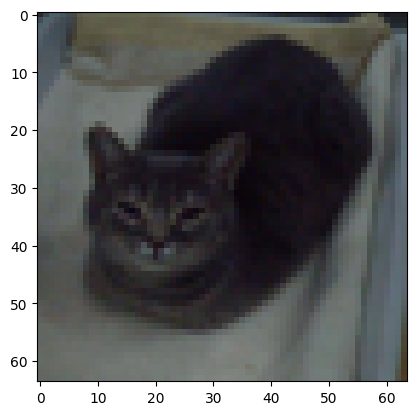

Gato


In [35]:
#Veamos la prueba
tests=10
for i in range(tests):
    index = np.random.randint(0, test_set_x.shape[1])
    image = Image.fromarray((test_set_x[:, index] * 255).astype(np.uint8).reshape((num_px, num_px, 3)))
    plt.imshow(image)
    plt.show()
    if output[0, index]==1:
      print("Perro")
    else:
      print("Gato")